<a href="https://colab.research.google.com/github/NaimurRahmanR/NaimurRahmanR/blob/main/StartUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset to examine its contents
file_path = '/content/startup data 2.csv'
startup_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure and contents
startup_data.head()



,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

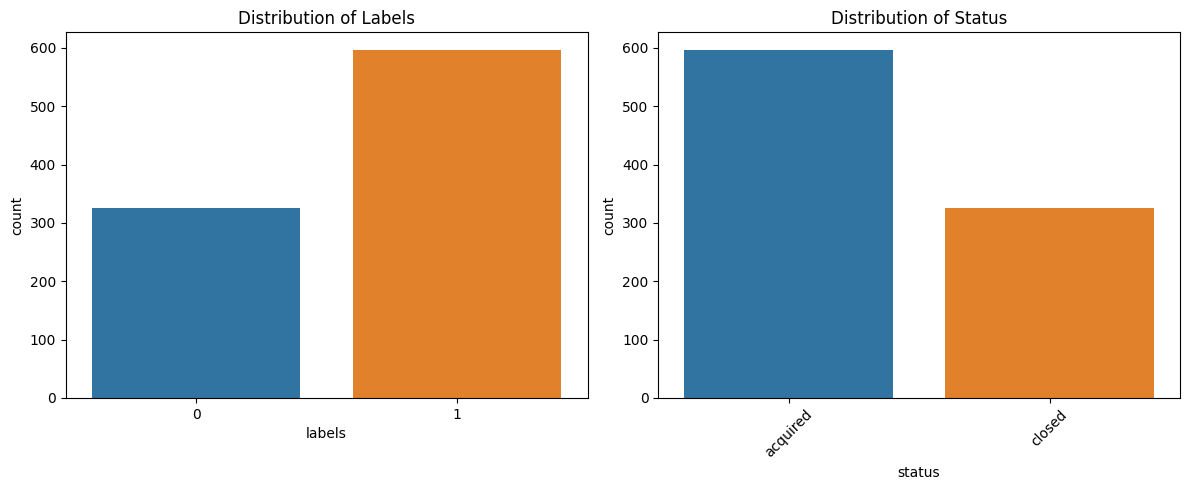

(None,
         Unnamed: 0    latitude   longitude      labels  \
 count   923.000000  923.000000  923.000000  923.000000   
 mean    572.297941   38.517442 -103.539212    0.646804   
 std     333.585431    3.741497   22.394167    0.478222   
 min       1.000000   25.752358 -122.756956    0.000000   
 25%     283.500000   37.388869 -122.198732    0.000000   
 50%     577.000000   37.779281 -118.374037    1.000000   
 75%     866.500000   40.730646  -77.214731    1.000000   
 max    1153.000000   59.335232   18.057121    1.000000   
 
        age_first_funding_year  age_last_funding_year  \
 count              923.000000             923.000000   
 mean                 2.235630               3.931456   
 std                  2.510449               2.967910   
 min                 -9.046600              -9.046600   
 25%                  0.576700               1.669850   
 50%                  1.446600               3.528800   
 75%                  3.575350               5.560250   
 max

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# General information about the dataset
dataset_info = startup_data.info()

# Descriptive statistics for the dataset
descriptive_stats = startup_data.describe()

# Checking the balance of the 'labels' column
label_distribution = startup_data['labels'].value_counts()

# Checking the distribution of the 'status' column
status_distribution = startup_data['status'].value_counts()

# Plotting the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='labels', data=startup_data)
plt.title('Distribution of Labels')

plt.subplot(1, 2, 2)
sns.countplot(x='status', data=startup_data)
plt.title('Distribution of Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

(dataset_info, descriptive_stats, label_distribution, status_distribution)


In [ ]:
# Data Cleaning and Preprocessing

# Dropping irrelevant or redundant columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 6', 'id', 'object_id', 'zip_code']
startup_data_cleaned = startup_data.drop(columns=columns_to_drop)

# Handling missing values
# For columns like 'closed_at', the missing values are meaningful (implying the startup is still open)
# We'll fill missing values in 'age_first_milestone_year' and 'age_last_milestone_year' with median values
milestone_columns = ['age_first_milestone_year', 'age_last_milestone_year']
startup_data_cleaned[milestone_columns] = startup_data_cleaned[milestone_columns].fillna(startup_data_cleaned[milestone_columns].median())

# Converting categorical variables to numerical format
# We'll use one-hot encoding for categorical variables with more than two categories
categorical_columns = startup_data_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('status')  # Excluding the 'status' column for now
startup_data_cleaned = pd.get_dummies(startup_data_cleaned, columns=categorical_columns)

# Inspecting the cleaned and processed data
startup_data_cleaned.info(), startup_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Columns: 2967 entries, latitude to category_code_web
dtypes: float64(7), int64(27), object(1), uint8(2932)
memory usage: 2.8+ MB


(None,
     latitude   longitude  labels  age_first_funding_year  \
 0  42.358880  -71.056820       1                  2.2493   
 1  37.238916 -121.973718       1                  5.1260   
 2  32.901049 -117.192656       1                  1.0329   
 3  37.320309 -122.050040       1                  3.1315   
 4  37.779281 -122.419236       0                  0.0000   
 
    age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
 0                 3.0027                    4.6685                   6.7041   
 1                 9.9973                    7.0055                   7.0055   
 2                 1.0329                    1.4575                   2.2055   
 3                 5.3151                    6.0027                   6.0027   
 4                 1.6685                    0.0384                   0.0384   
 
    relationships  funding_rounds  funding_total_usd  ...  \
 0              3               3             375000  ...   
 1              9    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding the 'status' column to a binary format
# Mapping 'acquired' to 1 and 'closed' to 0
label_encoder = LabelEncoder()
startup_data_cleaned['status_encoded'] = label_encoder.fit_transform(startup_data_cleaned['status'])

# Splitting the data into features (X) and target variable (y)
X = startup_data_cleaned.drop(['status', 'status_encoded'], axis=1)
y = startup_data_cleaned['status_encoded']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shape of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((738, 2966), (185, 2966), (738,), (185,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)

# Training the models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

# Making predictions on the test set
log_reg_pred = log_reg.predict(X_test)
dec_tree_pred = dec_tree.predict(X_test)
rand_forest_pred = rand_forest.predict(X_test)

# Evaluating the models
models = {'Logistic Regression': log_reg_pred, 'Decision Tree': dec_tree_pred, 'Random Forest': rand_forest_pred}
model_performance = {}

for model_name, model_pred in models.items():
    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred)
    recall = recall_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred)
    model_performance[model_name] = [accuracy, precision, recall, f1]

# Converting performance metrics to a DataFrame for better readability
performance_df = pd.DataFrame(model_performance, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

performance_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.648649,0.0,0.000000,0.000000
Decision Tree,1.000000,1.0,1.000000,1.000000
Random Forest,0.983784,1.0,0.953846,0.976378


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-Validation for the Random Forest model
cv_scores_accuracy = cross_val_score(rand_forest, X, y, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(rand_forest, X, y, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(rand_forest, X, y, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(rand_forest, X, y, cv=5, scoring='f1')

# Calculating the mean of the cross-validation scores
cv_mean_scores = {
    'CV Mean Accuracy': cv_scores_accuracy.mean(),
    'CV Mean Precision': cv_scores_precision.mean(),
    'CV Mean Recall': cv_scores_recall.mean(),
    'CV Mean F1 Score': cv_scores_f1.mean()
}

cv_mean_scores


{'CV Mean Accuracy': 0.9642655699177439,
 'CV Mean Precision': 0.9932125395455852,
 'CV Mean Recall': 0.904895104895105,
 'CV Mean F1 Score': 0.9462388493082997}

In [ ]:
import numpy as np

# Extracting feature importances from the Random Forest model
feature_importances = rand_forest.feature_importances_

# Matching feature names with their importances
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sorting features by their importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Converting to DataFrame for better readability
top_features_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance']).head(10)

top_features_df


,Feature,Importance
0,labels,0.296620
1,relationships,0.044103
2,funding_total_usd,0.027700
3,age_last_funding_year,0.025824
4,milestones,0.025334
5,age_first_funding_year,0.021494
6,age_last_milestone_year,0.021408
7,age_first_milestone_year,0.018365
8,longitude,0.016126
9,latitude,0.014326


In [ ]:
# Feature Engineering: Creating new features and reducing dimensionality

# Creating new features based on existing data
# Example: A ratio of funding total to the number of milestones
startup_data_cleaned['funding_per_milestone'] = startup_data_cleaned['funding_total_usd'] / (startup_data_cleaned['milestones'] + 1) # Adding 1 to avoid division by zero

# Checking for correlation of the new feature with the target variable
new_feature_corr = startup_data_cleaned[['funding_per_milestone', 'status_encoded']].corr()

# Dimensionality Reduction: Using only the most important features determined earlier
# Selecting the top N features based on feature importance
N = 20  # Number of top features to select
top_features = [feature for feature, importance in sorted_feature_importances[:N]]

# Creating a new DataFrame with selected features
X_reduced = startup_data_cleaned[top_features]

# Splitting the dataset into training and testing sets with the reduced features
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

new_feature_corr, X_train_reduced.shape, X_test_reduced.shape



(                       funding_per_milestone  status_encoded
 funding_per_milestone               1.000000       -0.031507
 status_encoded                     -0.031507        1.000000,
 (738, 20),
 (185, 20))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Retraining the Random Forest model with the reduced feature set
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# Making predictions on the test set
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Evaluating the model
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
precision_reduced = precision_score(y_test, y_pred_reduced)
recall_reduced = recall_score(y_test, y_pred_reduced)
f1_score_reduced = f1_score(y_test, y_pred_reduced)

# Compiling the evaluation metrics
evaluation_metrics_reduced = {
    'Accuracy': accuracy_reduced,
    'Precision': precision_reduced,
    'Recall': recall_reduced,
    'F1 Score': f1_score_reduced
}

evaluation_metrics_reduced



{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

In [ ]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation on the retrained Random Forest model with the reduced feature set
cv_scores_accuracy = cross_val_score(rf_model_reduced, X_reduced, y, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(rf_model_reduced, X_reduced, y, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(rf_model_reduced, X_reduced, y, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(rf_model_reduced, X_reduced, y, cv=5, scoring='f1')

# Calculating the mean of the cross-validation scores
cv_mean_scores = {
    'CV Mean Accuracy': cv_scores_accuracy.mean(),
    'CV Mean Precision': cv_scores_precision.mean(),
    'CV Mean Recall': cv_scores_recall.mean(),
    'CV Mean F1 Score': cv_scores_f1.mean()
}

cv_mean_scores



{'CV Mean Accuracy': 1.0,
 'CV Mean Precision': 1.0,
 'CV Mean Recall': 1.0,
 'CV Mean F1 Score': 1.0}

In [ ]:
# Adjusting hyperparameters to reduce model complexity
rf_model_adjusted = RandomForestClassifier(
    n_estimators=50,        # Reduced number of trees
    max_depth=10,           # Setting a maximum depth
    min_samples_leaf=4,     # Increasing minimum samples per leaf
    min_samples_split=10,   # Increasing minimum samples per split
    random_state=42
)

# Performing cross-validation on the adjusted model
cv_scores_accuracy_adjusted = cross_val_score(rf_model_adjusted, X_reduced, y, cv=5, scoring='accuracy')
cv_scores_precision_adjusted = cross_val_score(rf_model_adjusted, X_reduced, y, cv=5, scoring='precision')
cv_scores_recall_adjusted = cross_val_score(rf_model_adjusted, X_reduced, y, cv=5, scoring='recall')
cv_scores_f1_adjusted = cross_val_score(rf_model_adjusted, X_reduced, y, cv=5, scoring='f1')

# Calculating the mean of the cross-validation scores for the adjusted model
cv_mean_scores_adjusted = {
    'CV Mean Accuracy': cv_scores_accuracy_adjusted.mean(),
    'CV Mean Precision': cv_scores_precision_adjusted.mean(),
    'CV Mean Recall': cv_scores_recall_adjusted.mean(),
    'CV Mean F1 Score': cv_scores_f1_adjusted.mean()
}

cv_mean_scores_adjusted



{'CV Mean Accuracy': 1.0,
 'CV Mean Precision': 1.0,
 'CV Mean Recall': 1.0,
 'CV Mean F1 Score': 1.0}